In [26]:
from __future__ import absolute_import, division, print_function
import pathlib
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
import jovian

In [27]:
# version of tf
print(tf.__version__)  # 2.0.0
# download/ get  dataset using keras
# case study Auto MPG Data Set
dataset_path = keras.utils.get_file(
    "auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
print(dataset_path)  # /home/fotso/.keras/datasets/auto-mpg.data
colunm_name = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    " model year",
    "origin",
    # "car name"
]
raw_data = pd.read_csv(dataset_path, names=colunm_name,
                       na_values="?", comment="\t", sep=" ", skipinitialspace=True)

dataset = raw_data.copy()

2.1.0
C:\Users\Laurent\.keras\datasets\auto-mpg.data


In [28]:
dataset #398 rows × 8 columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [29]:
dataset.isna().sum() # car name -> na values 398

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
 model year     0
origin          0
dtype: int64

In [30]:
dataset = dataset.dropna()

In [31]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
 model year     0
origin          0
dtype: int64

In [32]:
# colunm origin is really categoricial but it convert in numerical
# use one shot vector of correspondance key city to one numvalue
# convert to onehot vector
origin = dataset.pop('origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Eroupe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

C:\Users\Laurent\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Laurent\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Laurent\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Eroupe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [33]:
dataset #392 rows × 10 columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Eroupe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0


In [35]:
# split data in 2 part : test and train data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

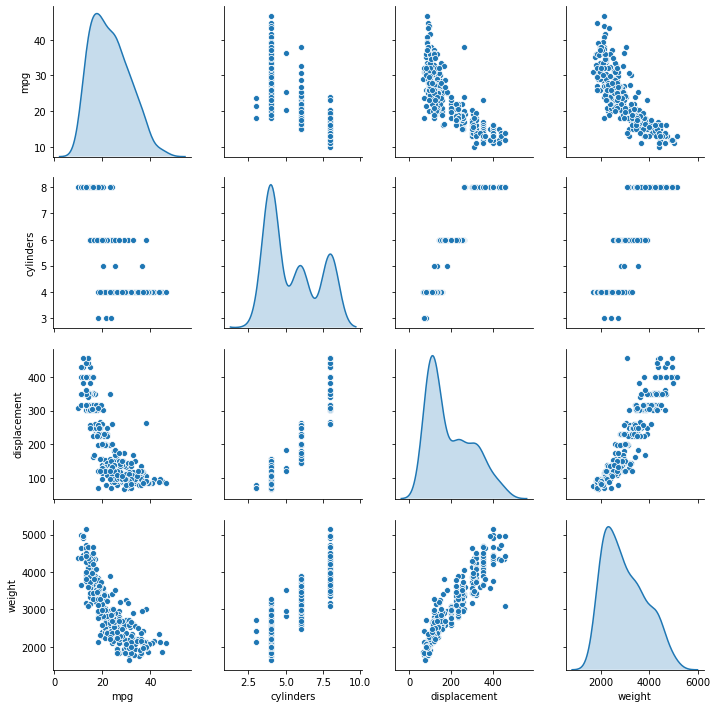

In [36]:
# TODO inspect data for well genelazation  using seaborn module(sns)
pairpt = sns.pairplot(train_dataset[["mpg",
                                     "cylinders",
                                     "displacement",
                                     "weight"]], diag_kind="kde")

In [38]:
# statistics of data
train_stats = dataset.describe()
train_stats.pop('mpg')
# print(train_stats)
train_stats = train_stats.transpose()

In [39]:
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.0,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.0,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.5,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.5,17.025,24.8
model year,392.0,75.979592,3.683737,70.0,73.000,76.0,79.000,82.0
USA,392.0,0.625000,0.484742,0.0,0.000,1.0,1.000,1.0
Eroupe,392.0,0.173469,0.379136,0.0,0.000,0.0,0.000,1.0
Japan,392.0,0.201531,0.401656,0.0,0.000,0.0,0.000,1.0


In [40]:
# split fature from label -> that is ours ouput you want to predicted
train_labels = train_dataset.pop('mpg')
test_labels = test_dataset.pop('mpg')

In [41]:
train_labels #Name: mpg, Length: 314, dtype: float64

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: mpg, Length: 314, dtype: float64

In [42]:
# Normalize the data
def norme(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_dataset = norme(train_dataset)
normed_test_dataset = norme(test_dataset)


In [43]:
normed_train_dataset

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Eroupe,Japan
146,-0.862911,-0.997783,-0.765614,-1.003746,-0.377448,-0.537387,0.773608,-0.457538,-0.501749
282,-0.862911,-0.519972,-0.427875,-0.103113,0.637463,0.819931,0.773608,-0.457538,-0.501749
69,1.482053,1.486832,1.442685,1.740536,-0.739916,-1.080314,0.773608,-0.457538,-0.501749
378,-0.862911,-0.854440,-1.077374,-1.003746,-0.304954,1.634321,0.773608,-0.457538,-0.501749
331,-0.862911,-0.930889,-0.973454,-0.980200,0.891190,1.091394,-1.289347,-0.457538,1.987943
...,...,...,...,...,...,...,...,...,...
281,0.309571,0.053400,-0.505815,0.014617,0.963684,0.819931,0.773608,-0.457538,-0.501749
229,1.482053,1.964642,1.962285,1.462694,-1.609839,0.277004,0.773608,-0.457538,-0.501749
150,-0.862911,-0.825771,-0.297975,-0.690584,-0.014980,-0.537387,-1.289347,-0.457538,1.987943
145,-0.862911,-1.064676,-1.129334,-1.147376,1.253659,-0.537387,-1.289347,-0.457538,1.987943


In [44]:
# build the model with kereas api
def build_model():
    model = keras.Sequential(
        [
            layers.Dense(64, activation=tf.nn.relu, input_shape=[
                         len(train_dataset.keys())]),
            layers.Dense(64, activation=tf.nn.relu),
            layers.Dense(1)

        ]
    )

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [45]:
# Create a model
model = build_model()

In [46]:
# Inspect model or summarize
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [47]:
# test model with batch example
batch_examples = normed_train_dataset[:10]
example_result = model.predict(batch_examples)

In [48]:
example_result

array([[-1.2978056e-01],
       [-1.8257493e-01],
       [ 9.8261684e-03],
       [-2.7918455e-01],
       [-1.0173678e-02],
       [ 9.7014837e-02],
       [ 2.3812056e-04],
       [ 1.5119095e-01],
       [ 2.7315438e-02],
       [ 5.5748045e-02]], dtype=float32)

In [49]:
# Train model and record the train in table and histogram


class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
#manage simple overfitting
early_stop = keras.callbacks.EarlyStopping(monitor ='val_loss',patience=30)

In [50]:
EPOCHS = 1000
# use 20% for validation
history = model.fit(normed_train_dataset,
                    train_labels,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stop,PrintDot()])


....................................................................................................
....................

In [51]:
# visualize progress of traning model using statsin history objects
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
115,5.749127,1.651990,5.749126,8.399003,2.161684,8.399003,115
116,5.806232,1.685380,5.806231,8.664189,2.156144,8.664188,116
117,5.746869,1.656521,5.746870,8.586501,2.144553,8.586501,117
118,5.762175,1.678728,5.762175,8.574034,2.120082,8.574035,118
119,5.720919,1.657127,5.720920,8.454669,2.179959,8.454668,119


In [52]:
# plot progress in histogram

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [mpg]')
    plt.plot(hist['epoch'],
             hist['mae'],
             label='Train error'
             )
    plt.plot(hist['epoch'],
             hist['val_mae'],
             label='Val error'
             )
    plt.legend()
    plt.ylim([0, 20])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [mpg]')
    plt.plot(hist['epoch'],
             hist['mse'],
             label='Train error'
             )
    plt.plot(hist['epoch'],
             hist['val_mse'],
             label='Val error'
             )
    plt.legend()
    plt.ylim([0, 20])
    
   

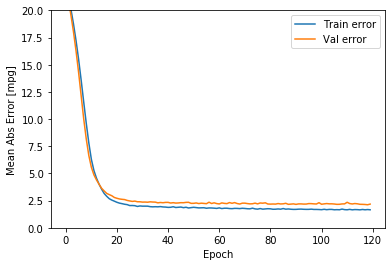

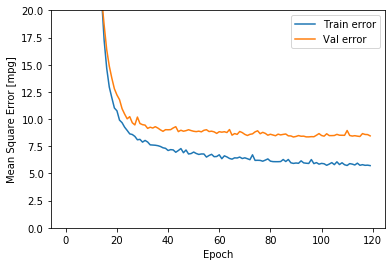

In [53]:
plot_history(history)

In [54]:
#test performing
loss,mae,mse = model.evaluate(normed_test_dataset,
                              test_labels,
                              verbose = 0
                              )
print("Testing set Mean Absolute Error: {:5.2f}  mpg".format(mae))


Testing set Mean Absolute Error:  1.92  mpg


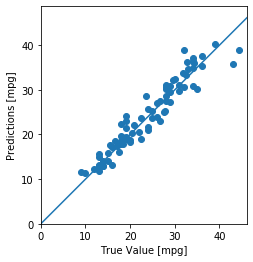

In [55]:
#make prediction use data test data, visualize matching to trrue value
test_predictions = model.predict(normed_test_dataset).flatten()

plt.scatter(test_labels,test_predictions)
plt.xlabel('True Value [mpg]')
plt.ylabel('Predictions [mpg]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ =plt.plot([-100,100],[-100,100])
plt.show()

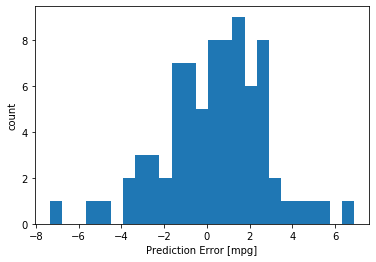

In [56]:
#Error distribution
error = test_predictions - test_labels
plt.hist(error,bins=25)
plt.xlabel('Prediction Error [mpg]')
plt.ylabel("count")

plt.show()#not quite guassian , but it expected because you have small data

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
